In [474]:
!pip install mlxtend
!pip install prophet
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [475]:
happiness = pd.read_csv("Resources/WHR 2005 to 2023.csv")
happiness_total = pd.read_csv("Resources/WHR 2005 to 2023.csv")
happiness_ref = pd.read_csv("Resources/2019_global_happiness_reference.csv")
happiness.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2021,2.436034,7.324032,0.454175,54.549999,0.394306,-0.081011,0.946299,0.178886,0.606713,0.255620
1,Afghanistan,South Asia,2022,1.281271,NaN,0.228217,54.875000,0.368377,NaN,0.733198,0.205868,0.575512,NaN
2,Lebanon,Middle East and North Africa,2021,2.178809,9.470949,0.506775,66.150002,0.422697,-0.161281,0.905279,0.263487,0.569101,0.106694
3,Turkiye,Middle East and North Africa,2021,4.366640,10.356681,0.736195,68.750000,0.446528,-0.036791,0.810166,0.297092,0.470579,NaN
4,Lebanon,Middle East and North Africa,2022,2.352428,9.428473,0.534528,66.224998,0.449575,-0.125514,0.882996,0.297508,0.429903,NaN


In [476]:
# happiness_total.info()
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       2336 non-null   object 
 1   Regional Indicator                 2336 non-null   object 
 2   Year                               2336 non-null   int64  
 3   Life Ladder                        2336 non-null   float64
 4   Log GDP Per Capita                 2316 non-null   float64
 5   Social Support                     2323 non-null   float64
 6   Healthy Life Expectancy At Birth   2281 non-null   float64
 7   Freedom To Make Life Choices       2303 non-null   float64
 8   Generosity                         2263 non-null   float64
 9   Perceptions Of Corruption          2220 non-null   float64
 10  Positive Affect                    2175 non-null   float64
 11  Negative Affect                    2183 non-null   float

In [477]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 2.9582357299399813e+18
R^2 Score: -2.366326799350925e+18


In [478]:
happiness.shape

(2336, 13)

In [479]:
happiness.dtypes

Country Name                          object
Regional Indicator                    object
Year                                   int64
Life Ladder                          float64
Log GDP Per Capita                   float64
Social Support                       float64
Healthy Life Expectancy At Birth     float64
Freedom To Make Life Choices         float64
Generosity                           float64
Perceptions Of Corruption            float64
Positive Affect                      float64
Negative Affect                      float64
Confidence In National Government    float64
dtype: object

In [480]:
happiness.isnull().sum()

Country Name                           0
Regional Indicator                     0
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    20
Social Support                        13
Healthy Life Expectancy At Birth      55
Freedom To Make Life Choices          33
Generosity                            73
Perceptions Of Corruption            116
Positive Affect                      161
Negative Affect                      153
Confidence In National Government    498
dtype: int64

In [481]:
# sns.pairplot(happiness)

In [482]:
happiness_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Variable     11 non-null     object
 1   Description  11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


In [483]:
happiness_ref.head(20)

,Variable,Description
0,country,Name of the country.
1,year,"Survey year, ranging from 2005-2018."
2,happiness,A happiness ranking on a scale of 0 to 10.
3,wealth,"Log GDP per capita, which indicates the wealth..."
4,support,A value that indicates how many people have fa...
5,health,Healthy life expectancy at birth.
6,freedom,Satisfaction with individual freedom to make l...
7,generosity,Measure of how likely people are to donate to ...
8,corruption,Measure of national corruption
9,positivity,"Average of measures for happiness, laugh and ..."


In [484]:
cols_to_plot = ['']

In [485]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 2.9582357299399813e+18
R^2 Score: -2.366326799350925e+18


In [486]:
happiness_total.head(50)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2021,2.436034,7.324032,0.454175,54.549999,0.394306,-0.081011,0.946299,0.178886,0.606713,0.255620
1,Afghanistan,South Asia,2022,1.281271,NaN,0.228217,54.875000,0.368377,NaN,0.733198,0.205868,0.575512,NaN
2,Lebanon,Middle East and North Africa,2021,2.178809,9.470949,0.506775,66.150002,0.422697,-0.161281,0.905279,0.263487,0.569101,0.106694
3,Turkiye,Middle East and North Africa,2021,4.366640,10.356681,0.736195,68.750000,0.446528,-0.036791,0.810166,0.297092,0.470579,NaN
4,Lebanon,Middle East and North Africa,2022,2.352428,9.428473,0.534528,66.224998,0.449575,-0.125514,0.882996,0.297508,0.429903,NaN
5,Lebanon,Middle East and North Africa,2019,4.024220,9.751047,0.865969,66.000000,0.447001,-0.095516,0.890416,0.307577,0.494499,0.154975
6,Afghanistan,South Asia,2019,2.375092,7.640086,0.419973,53.900002,0.393656,-0.106016,0.923849,0.324108,0.502474,0.341482
7,Turkiye,Middle East and North Africa,2020,4.861554,10.256719,0.856730,68.574997,0.510386,-0.117426,0.774417,0.331563,0.440387,NaN
8,Turkiye,Middle East and North Africa,2019,4.872074,10.245305,0.791656,68.400002,0.631084,-0.139380,0.760442,0.347481,0.368089,NaN
9,Georgia,Commonwealth of Independent States,2007,3.707195,9.117117,0.548369,63.400002,0.463723,-0.269574,0.697340,0.350957,0.235847,0.327634


In [498]:
# imputer = SimpleImputer(strategy='mean')
# imputer.fit(happiness.select_dtypes(include=np.number))

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Afghanistan'

In [488]:
happiness_imputed = pd.DataFrame(imputer.transform(happiness.select_dtypes(include=np.number)), columns=happiness.select_dtypes(include=np.number).columns)

In [489]:
categorical_cols = happiness.select_dtypes(exclude=np.number).columns
happiness_imputed[categorical_cols] = happiness[categorical_cols]

In [490]:
happiness_imputed.isnull().sum()

Year                                 0
Life Ladder                          0
Log GDP Per Capita                   0
Social Support                       0
Healthy Life Expectancy At Birth     0
Freedom To Make Life Choices         0
Generosity                           0
Perceptions Of Corruption            0
Positive Affect                      0
Negative Affect                      0
Confidence In National Government    0
Country Name                         0
Regional Indicator                   0
dtype: int64

In [491]:
happiness_imputed.to_csv("Resources/preprocessed_happiness_data.csv", index=False)

In [492]:
X = happiness_imputed.drop(columns=['Life Ladder'])
y = happiness_imputed['Life Ladder']

In [493]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [494]:
print("X_train data types:")
print(X_train.dtypes)
print("\n")
print("y_train data types:")
print(y_train.dtypes)

X_train data types:
Year                                 float64
Log GDP Per Capita                   float64
Social Support                       float64
Healthy Life Expectancy At Birth     float64
Freedom To Make Life Choices         float64
Generosity                           float64
Perceptions Of Corruption            float64
Positive Affect                      float64
Negative Affect                      float64
Confidence In National Government    float64
Country Name                          object
Regional Indicator                    object
dtype: object


y_train data types:
float64


In [495]:
# Perform one-hot encoding on categorical variables
happiness_encoded = pd.get_dummies(happiness_imputed, columns=['Country Name', 'Regional Indicator'])

In [496]:
from sklearn.linear_model import LinearRegression

# Define the model
model = LinearRegression()

In [444]:
# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

In [445]:
# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [446]:
# Train the model
model.fit(X_train_encoded, y_train)

LinearRegression()

In [447]:
# Evaluate the model
y_pred = model.predict(X_test_encoded)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 2.9582357299399813e+18
R^2 Score: -2.366326799350925e+18


In [448]:
# Train the model
model.fit(X_train_encoded, y_train)

LinearRegression()

In [449]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the grid of hyperparameters
param_grid = {
    'fit_intercept': [True, False]
}

# Initialize LinearRegression model
model = LinearRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_encoded, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
y_pred_best = best_model.predict(X_test_encoded)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Mean Squared Error (Best Model):", mse_best)
print("R^2 Score (Best Model):", r2_best)

Best Hyperparameters: {'fit_intercept': False}
Mean Squared Error (Best Model): 267790078145.56577
R^2 Score (Best Model): -214208364837.1149


In [450]:
from prophet import Prophet

# Create a Prophet model
prophet_model = Prophet()

In [451]:
model = Prophet()

In [452]:
print(happiness.head())
print(happiness.dtypes)

  Country Name            Regional Indicator  Year  Life Ladder  \
0  Afghanistan                    South Asia  2021     2.436034   
1  Afghanistan                    South Asia  2022     1.281271   
2      Lebanon  Middle East and North Africa  2021     2.178809   
3      Turkiye  Middle East and North Africa  2021     4.366640   
4      Lebanon  Middle East and North Africa  2022     2.352428   

   Log GDP Per Capita  Social Support  Healthy Life Expectancy At Birth  \
0            7.324032        0.454175                         54.549999   
1                 NaN        0.228217                         54.875000   
2            9.470949        0.506775                         66.150002   
3           10.356681        0.736195                         68.750000   
4            9.428473        0.534528                         66.224998   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                      0.394306   -0.081011                   0.946299  

In [453]:
# Convert 'Year' column to datetime format and rename it to 'ds'
happiness['ds'] = pd.to_datetime(happiness['Year'], format='%Y')

# Select a column containing the target variable and rename it to 'y'
happiness.rename(columns={'Life Ladder': 'y'}, inplace=True)

# Check the first few rows and data types again to verify the changes
print(happiness.head())
print(happiness.dtypes)

  Country Name            Regional Indicator  Year         y  \
0  Afghanistan                    South Asia  2021  2.436034   
1  Afghanistan                    South Asia  2022  1.281271   
2      Lebanon  Middle East and North Africa  2021  2.178809   
3      Turkiye  Middle East and North Africa  2021  4.366640   
4      Lebanon  Middle East and North Africa  2022  2.352428   

   Log GDP Per Capita  Social Support  Healthy Life Expectancy At Birth  \
0            7.324032        0.454175                         54.549999   
1                 NaN        0.228217                         54.875000   
2            9.470949        0.506775                         66.150002   
3           10.356681        0.736195                         68.750000   
4            9.428473        0.534528                         66.224998   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                      0.394306   -0.081011                   0.946299   
1               

In [454]:
# # Rename the datetime column to 'ds'
# df_test.rename(columns={'Year': 'ds'}, inplace=True)

# # Evaluate the model on the test data
# y_pred_test = model.predict(X_test_encoded)
# mse_test = mean_squared_error(y_test, y_pred_test)
# r2_test = r2_score(y_test, y_pred_test)
# print("Test Mean Squared Error:", mse_test)
# print("Test R^2 Score:", r2_test)

In [455]:
# # Rename the datetime column to 'ds'
# df_test.rename(columns={'date': 'ds'}, inplace=True)

# # Evaluate the model on the training data
# y_pred_train = model.predict(X_train_encoded)
# mse_train = mean_squared_error(y_train, y_pred_train)
# r2_train = r2_score(y_train, y_pred_train)
# print("Training Mean Squared Error:", mse_train)
# print("Training R^2 Score:", r2_train)

# # Evaluate the model on the training data
# y_pred_train = model.predict(X_train_encoded)
# mse_train = mean_squared_error(y_train, y_pred_train)
# r2_train = r2_score(y_train, y_pred_train)
# print("Training Mean Squared Error:", mse_train)
# print("Training R^2 Score:", r2_train)

In [456]:
# Fit the Prophet model to the data
model.fit(happiness)

20:42:24 - cmdstanpy - INFO - Chain [1] start processing
20:42:25 - cmdstanpy - INFO - Chain [1] done processing


In [457]:
# Create a DataFrame for the next X years
future_dates = model.make_future_dataframe(periods=30, freq='Y')

In [458]:
# Make predictions for the future dates
forecast = model.predict(future_dates)

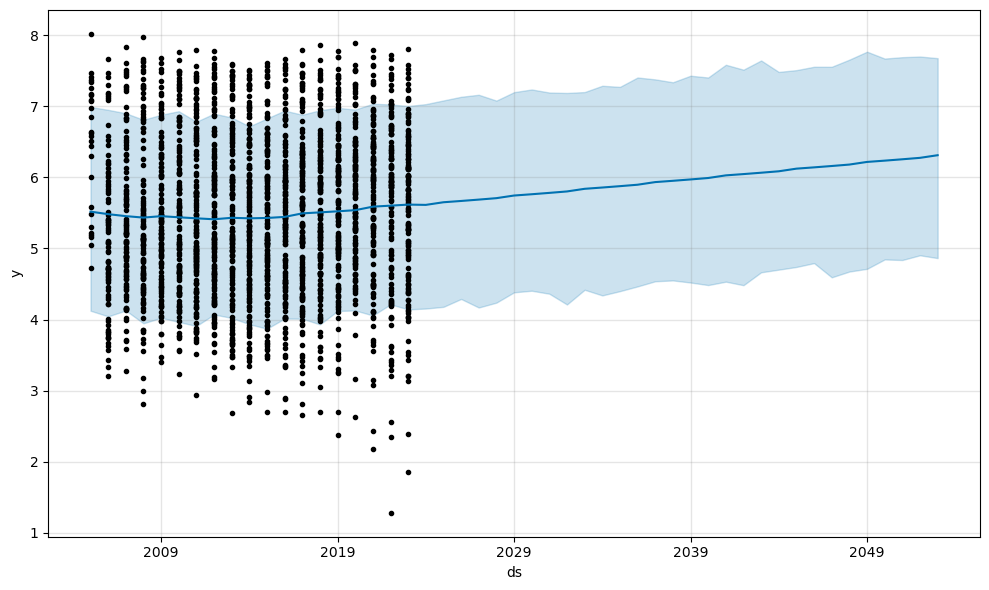

In [459]:
# Plot the forecast
fig = model.plot(forecast)

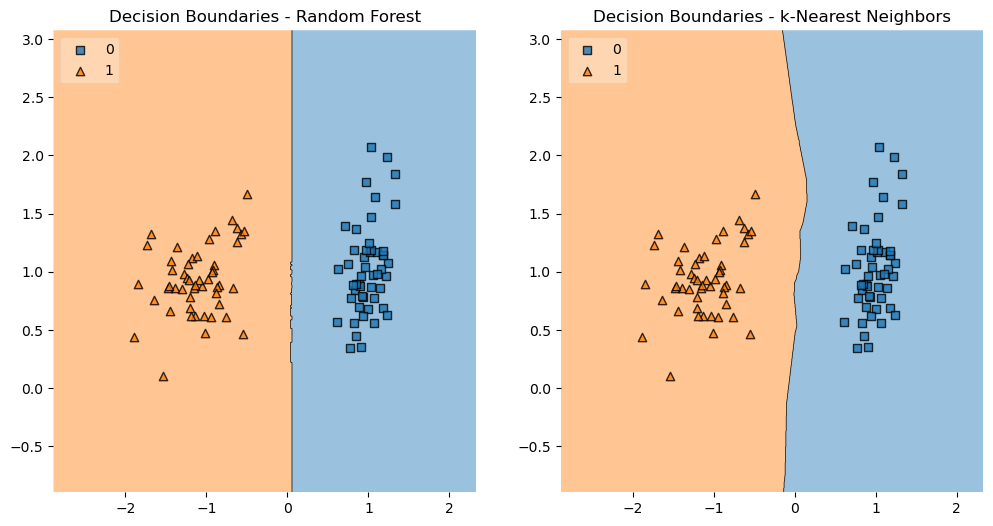

In [460]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

# Define classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Fit classifiers
rf_clf.fit(X, y)
knn_clf.fit(X, y)

# Plot decision boundaries
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(X, y, clf=rf_clf, legend=2)
plt.title('Decision Boundaries - Random Forest')

plt.subplot(1, 2, 2)
plot_decision_regions(X, y, clf=knn_clf, legend=2)
plt.title('Decision Boundaries - k-Nearest Neighbors')

plt.show()

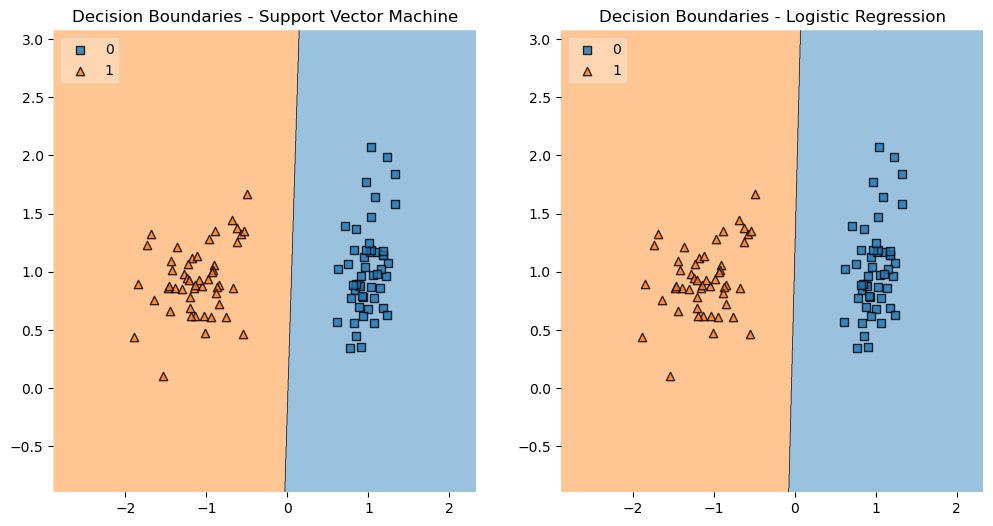

In [461]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define classifiers
svm_clf = SVC(kernel='linear', C=1.0, random_state=1)
lr_clf = LogisticRegression(random_state=1)

# Fit classifiers
svm_clf.fit(X, y)
lr_clf.fit(X, y)

# Plot decision boundaries
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(X, y, clf=svm_clf, legend=2)
plt.title('Decision Boundaries - Support Vector Machine')

plt.subplot(1, 2, 2)
plot_decision_regions(X, y, clf=lr_clf, legend=2)
plt.title('Decision Boundaries - Logistic Regression')

plt.show()

In [45]:
# # Evaluate the model on the training data
# y_pred_train = model.predict(X_train_encoded)
# mse_train = mean_squared_error(y_train, y_pred_train)
# r2_train = r2_score(y_train, y_pred_train)
# print("Training Mean Squared Error:", mse_train)
# print("Training R^2 Score:", r2_train)

In [462]:
print("Mean Squared Error (Best Model):", mse_best)
print("R^2 Score (Best Model):", r2_best)

Mean Squared Error (Best Model): 267790078145.56577
R^2 Score (Best Model): -214208364837.1149


In [497]:
# Evaluate the model
y_pred = model.predict(X_test_encoded)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.